read on jacknife and bootstrapping

Statistical power
Beta: rate of type two error
is 1-Beta

welch's t-test
usses statistical power

multiple comparisons: look into it

Anova: look into it

# Effect sizes


Definition: is used to quantify the size of the diff between 2 groups under observation
Are easy to calculate, understand and apply to any meausres outcome and are applicable to a multitude if study domains

P-Value vs Effect Size
P-value is 1 - cumulative probability upto a certain point

P - Value = probability sample means are the same

1-p = confidence level = probability sample means are different

Effect size = how different sample means are

Calculating effect size in Python

In [34]:
# Import necessary modules 
from __future__ import print_function, division
import numpy as np

# Import SciPy stats and matplotlib for calculating and visualising effect size
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

# seed the random number generator so you get the same results
np.random.seed(10)



To explore statistics that quantify effect size, let's first look at the difference in height between men and women in the USA, based on the mean and standard deviation for male and female heights as given in (BRFSS) Behavioral Risk Factor Surveillance System.

Males Height (Mean = 178 , Standard Deviation = 7.7)

Female Height (Mean = 163 , Standard Deviation = 7.3)

the two parameters that are used in a normal distribution

mean and standard deviation

In [35]:
#Mean height and sd for males
male_mean = 178
male_sd = 7.7

# Generate a normal distribution for male heights 
male_height = scipy.stats.norm(male_mean, male_sd)

In [36]:
male_height

In [37]:
female_mean = 163
female_sd = 7.3
female_height = scipy.stats.norm(female_mean, female_sd)

In [38]:
female_height

Evaluate Probability Density Function
used for continuous random variable

In [39]:
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

The expected value of a standard normal distribution is 0. 
Explanation: A standard normal distribution is a normal distribution with a mean of 0 and a standard deviation of 1. Since the mean is the same as the expected value, the expected value of a standard normal distribution is also 0. 
Key points about the standard normal distribution:
Mean (μ): 0
Standard deviation (σ): 1 

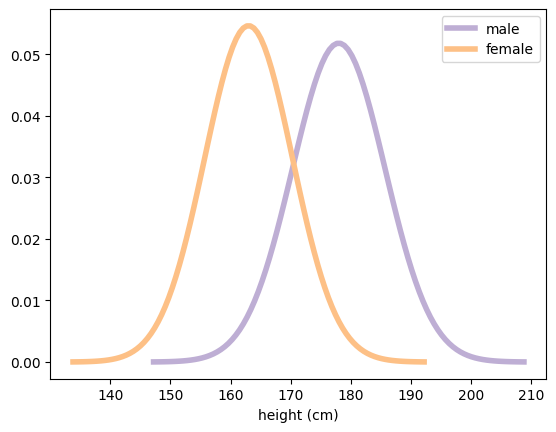

In [40]:
# Male height
xs, ys = evaluate_PDF(male_height)
plt.plot(xs, ys, label='male', linewidth=4, color='#beaed4') # grayish violet

#Female height 
xs, ys = evaluate_PDF(female_height)
plt.plot(xs, ys, label='female', linewidth=4, color='#fdc086') # color code contains mainly red color
plt.xlabel('height (cm)')
plt.legend() # shows which color is male and which is female


Un-standardized or Simple Effect Size Calculation

You can use the rvs method from scipy.stats to generate a random sample of size 1000 from the population distributions. Note that these are totally random and representative samples, with no measurement error.

In [66]:
male_sample = male_height.rvs(1000)

The resulting samples are NumPy arrays, so we can now easily calculate the mean and standard deviation of random samples.

In [42]:
mean1, std1 = male_sample.mean(), male_sample.std()
mean1, std1
# (177.88791390576085, 7.222274730410271)

(np.float64(177.88791390576085), np.float64(7.222274730410271))

The sample mean is close to the population mean, but not exactly the same, as expected.
it is a true representation of the population mean same to Standard deviation

Now, perform above calculation for female heights to calculate mean and sd of random samples from female_height rv object**

In [67]:
female_sample = female_height.rvs(1000)
mean2, std2 = female_sample.mean(), female_sample.std()
mean2, std2
# (162.91903182040372, 7.261850929417819)

(np.float64(162.71502035393277), np.float64(7.312391114260545))

And the results are similar for the female sample.

it is a true representation of the population mean same to Standard deviation

Now, there are many ways to describe the magnitude of the difference between these distributions. An obvious one is the difference in the means.

Now, calculate the difference in means of both distributions identified above.

In [44]:
difference_in_means = male_sample.mean() - female_sample.mean()
difference_in_means # in cm
# 14.968882085357137

np.float64(14.968882085357137)

This shows that, on average, men are around 15 centimeters taller. For some applications, that would be a good way to describe the difference, but there are caveats:

1. Without knowing more about the distributions (like the standard deviations or spread of each distribution), it's hard to interpret whether a difference like 15 cm is a big difference or not.

2. The magnitude of the difference depends on the units of measure, making it hard to compare across different studies that may be conducted with different units of measurement.

There are a number of ways to quantify the difference between distributions. A simple option is to express the difference as a percentage of the mean.

Let's figure out the relative difference in the means of two populations, scaled by the mean of male heights and expressed as a percentage.

In [45]:
relative_difference = difference_in_means / male_sample.mean()
relative_difference * 100   # percent

#  8.414783082614122


np.float64(8.414783082614122)

But a problem with relative differences is that you have to choose which mean to express them relative to.

In [46]:
relative_difference = difference_in_means / female_sample.mean()
relative_difference * 100    # percent

# 9.18792722869745

np.float64(9.18792722869745)

to do away with this we use
Overlap Threshold
As you can see above, there is still a difference in results when you express the relative difference, depending on whether we choose to represent the ratio relative to male height or female height. Perhaps you can look for the amount of overlap between the two distributions. To define overlap, you choose a threshold between the two means. The simple threshold is the midpoint between the means:



In [47]:
simple_thresh = (mean1 + mean2) / 2
simple_thresh

np.float64(170.4034728630823)

A better, but slightly more complicated threshold is the place where the PDFs cross.

In [48]:
thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)
thresh

np.float64(170.42392323303363)

the tail on the right of the graph represents the outlier bit of the population: acts as a demarcation

the right are taller

the males are below the threshold and females above in that overlap

In [49]:
male_below_thresh = sum(male_sample < thresh)
male_below_thresh

np.int64(154)

In [50]:
female_above_thresh = sum(female_sample > thresh)
female_above_thresh

np.int64(152)

Now, take a look at what these thresholds look like when laid over the Probability Density Functions of both samples' distributions.

Text(0.5, 0, 'height (cm)')

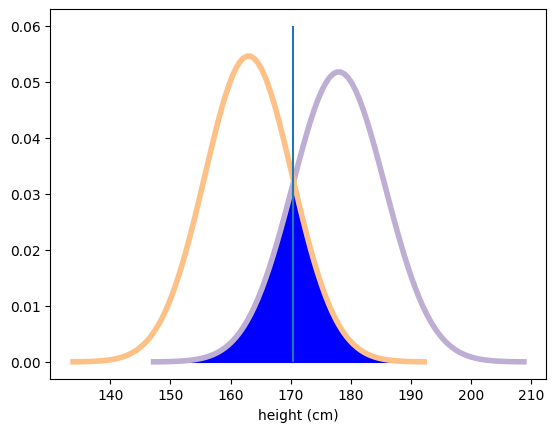

In [51]:
# Male height
m_xs, male_ys = evaluate_PDF(male_height)
plt.plot(m_xs, male_ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
f_xs, female_ys = evaluate_PDF(female_height)
plt.plot(f_xs, female_ys, label='female', linewidth=4, color='#fdc086')
plt.vlines(thresh,ymin=0,ymax=0.06)
plt.fill_betweenx(male_ys,x1 = m_xs,x2=thresh, where = m_xs < thresh,color='b')
plt.fill_betweenx(female_ys,x1=f_xs,x2=thresh, where = f_xs > thresh,color='b')
plt.xlabel('height (cm)')

The "overlap" (shaded region above) is the total AUC (Area Under the Curves). You can use this to identify the samples that end up on the wrong side of the threshold. You can calculate the amount of overlap as shown below.

In [52]:
# Calculate the overlap 
overlap = male_below_thresh / len(male_sample) + female_above_thresh / len(female_sample)
overlap

np.float64(0.306)

Or in more practical terms, you might report the fraction of people who would be misclassified if you tried to use height to guess sex:

In [53]:
misclassification_rate = overlap / 2
misclassification_rate

np.float64(0.153)

# Assignement
Probability of superiority (Non-parametric)
Question: If you chose a male and a female sample at random, what is the probability that males are taller than females?

In [ ]:
#sum(x > y for x, y in zip(male_sample, female_sample)) / len(male_sample) #research on this

np.float64(0.94)

In [76]:
male_sample = male_height.rvs(1000)
female_sample = female_height.rvs(1000)
def overlap_superiority(male_sample, female_sample, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    group1: scipy.stats rv object
    group2: scipy.stats rv object
    n: sample size
    """

    # Get a sample of size n from both groups
    male_sample = male_sample.rvs(n)
    female_sample = female_sample.rvs(n)
    
    # Identify the threshold between samples
    thresh = (male_sample.mean() + female_sample.mean()) / 2
    print(thresh)
    
    # Calculate no. of values above and below for group 1 and group 2 respectively
    above = sum(male_sample < thresh)
    below = sum(female_sample > thresh)
    
    # Calculate the overlap
    overlap = (above + below) / n
    
    # Calculate probability of superiority
    superiority = sum(x > y for x, y in zip(male_sample, female_sample)) / n

    return overlap, superiority

In [77]:

overlap_superiority(male_height, female_height, n=1000)

170.56717414671266


(np.float64(0.331), np.float64(0.92))

Standardized effect size
Cohen's d


Cohen’s d is one of the most common ways to measure effect size. As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable.

The basic formula to calculate Cohen’s 
d is:

d = effect size (difference of means) / pooled standard deviation

The denominator is the standardiser, and it is important to select the most appropriate one for a given dataset. The pooled standard deviation is the average spread of all data points around their group mean (not the overall mean).

In [ ]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

Computing the denominator is a little complicated; in fact, people have proposed several ways to do it. Here is a brief description of using standardizers while calculating Cohen's 
d
 for standardized effect sizes.

This implementation uses the "pooled standard deviation," which is a weighted average of the standard deviations of the two groups.

And here's the result for the difference in height between men and women.

In [ ]:
Cohen_d(male_sample, female_sample)

np.float64(2.0669285200851877)

Interpreting d

Most people don't have a good sense of how big d = 2.0 is. If you are having trouble visualizing what the result of Cohen’s D means, use these general “rule of thumb” guidelines (which Cohen said should be used cautiously):

Small effect = 0.2

Medium Effect = 0.5

Large Effect = 0.8

Here is an excellent online visualization tool developed by Kristoffer Magnusson to help interpret the results of cohen's 
d
 statistic.

The following function that takes Cohen's 
d
, plots normal distributions with the given effect size, and prints their overlap and superiority.

In [ ]:
def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    plt.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    plt.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)
    print('superiority', s)

Here's an example that demonstrates the function:

NameError: name 'overlap_superiority' is not defined

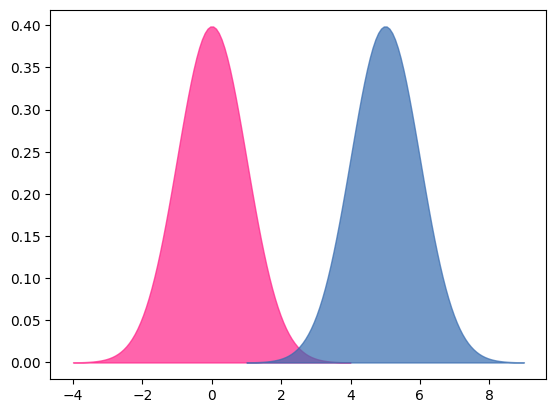

In [ ]:
plot_pdfs(5)
# Try changing the d value and observe the effect on the outcome below

do assignement ndio error iwe solved

# Statistical power

Statistical power
Beta: rate of type two error
is 1-Beta

read on this:
Resampling methods
MonteCarlo Simulations
Welch's T-test
Multiple Comparison's problem
Goodhart's law and metric tracking